# Ames Housing Predictions

https://www.kaggle.com/c/dsi-us-5-project-2-regression-challenge/data

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict for this challenge.


* MSSubClass: The building class (categorical with numeric label, i.e 20= 1-STORY 1946 & NEWER ALL STYLES
* MSZoning: Identifies the general zoning classification of the sale. categorical (i.e. A=Agriculutre, C=Commercial)
* LotFrontage: Linear feet of street connected to property Numeric
* LotArea: Lot size in square feet Numeric
* Street: Type of road access to property (categorical, i.e. Grvl=Gravel, Pave=Paved)
* Alley: Type of alley access to property
* LotShape: General shape of property (categorical, ie. reg=Regular
* LandContour: Flatness of the property (categorical, ie Lvl = near flat/level)
* Utilities: Type of utilities available ((categorical, i.e. AllPub = all public utilities
* LotConfig: Lot configuration (categorical, i.e. inside = inside lot
* Neighborhood: Physical locations within Ames city limits (categorical,i.e. Blmgtn = Bloomington heights
* Condition1: Proximity to main road or railroad (i.e. Norm = Normal)
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling categorical i.e. 1FAM  Single-family Detached
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality, Categorical numeric label from 1-10 (very poor - very excellent)
* OverallCond: Overall condition rating  Categorical numeric label from 1-10 (very poor - very excellent)
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
* RoofStyle: Type of roof (i.e. Flat = Flat)
* RoofMatl: Roof material (i.e. ClyTile Clay or Tile
* Exterior1st: Exterior covering on house (AsbShng Asbestos Shingles
* Exterior2nd: Exterior covering on house (if more than one material) (AsbShng Asbestos Shingles
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality (Ex Excellent... Po Poor)
* ExterCond: Present condition of the material on the exterior  (Ex Excellent... Po Poor)
* Foundation: Type of foundation (BrkTil Brick & Tile
* BsmtQual: Height of the basement  (Ex Excellent... Po Poor)
* BsmtCond: General condition of the basement  (Ex Excellent... Po Poor)
* BsmtExposure: Walkout or garden level basement walls (Gd Good Exposure
* BsmtFinType1: Quality of basement finished area (GLQ Good Living Quarters
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present) (GLQ Good Living Quarters
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating (Floor Floor Furnace
* HeatingQC: Heating quality and condition  (Ex Excellent... Po Poor)
* CentralAir: Central air conditioning (N/Y
* Electrical: Electrical system (SBrkr Standard Circuit Breakers & Romex
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality ( (Ex Excellent... Po Poor)
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating (Typ Typical Functionality
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality  (Ex Excellent... Po Poor)
* GarageType: Garage location (2Types More than one type of garage
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage (Fin Finished
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality  (Ex Excellent... Po Poor)
* GarageCond: Garage condition  (Ex Excellent... Po Poor)
* PavedDrive: Paved driveway (Y Paved
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality  (Ex Excellent... Po Poor)
* Fence: Fence quality  (Ex Excellent... Po Poor)
* MiscFeature: Miscellaneous feature not covered in other categories ( Elev Elevator, Gar2 2nd Garage (if not described in garage section)
* MiscVal: Dollar Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale ( WD Warranty Deed - Conventional

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import recall_score , accuracy_score, precision_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, Imputer, FunctionTransformer,PolynomialFeatures
)

from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, SelectPercentile, 
    SelectFromModel, f_regression, RFECV
)

from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer
from sklearn.model_selection import GridSearchCV

import pandas as pd
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook') # show and interact ith plots in jupyter notebook

%matplotlib inline

In [2]:
run_full = True
do_logtransform_price=True
chosen_model="LinearRegression"

In [3]:
df = pd.read_csv("train.csv")
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


#### Data Clean up

In [4]:
df.shape

(2051, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [6]:
df.describe().T
# columsn with particular skew
# Lot Area,BsmtFin SF 1, BsmtFin SF 2 -- basically all measurements

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
PID,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
MS SubClass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
Lot Frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
Lot Area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
Overall Qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
Overall Cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
Year Built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
Year Remod/Add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
Mas Vnr Area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


In [7]:
# what columns have nulls and how many?
for col in df.columns:
    if df[col].isna().sum() > 0:
        print(col, df[col].isnull().sum())


Lot Frontage 330
Alley 1911
Mas Vnr Type 22
Mas Vnr Area 22
Bsmt Qual 55
Bsmt Cond 55
Bsmt Exposure 58
BsmtFin Type 1 55
BsmtFin SF 1 1
BsmtFin Type 2 56
BsmtFin SF 2 1
Bsmt Unf SF 1
Total Bsmt SF 1
Bsmt Full Bath 2
Bsmt Half Bath 2
Fireplace Qu 1000
Garage Type 113
Garage Yr Blt 114
Garage Finish 114
Garage Cars 1
Garage Area 1
Garage Qual 114
Garage Cond 114
Pool QC 2042
Fence 1651
Misc Feature 1986


### EDA

In [8]:
def make_pair_plot(df_corr):
    # Set the default matplotlib figure size to 7x7:
    fix, ax = plt.subplots(figsize=(18,15))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True, cmap="BrBG")

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

Do a prelimary check on correlation with numeric features

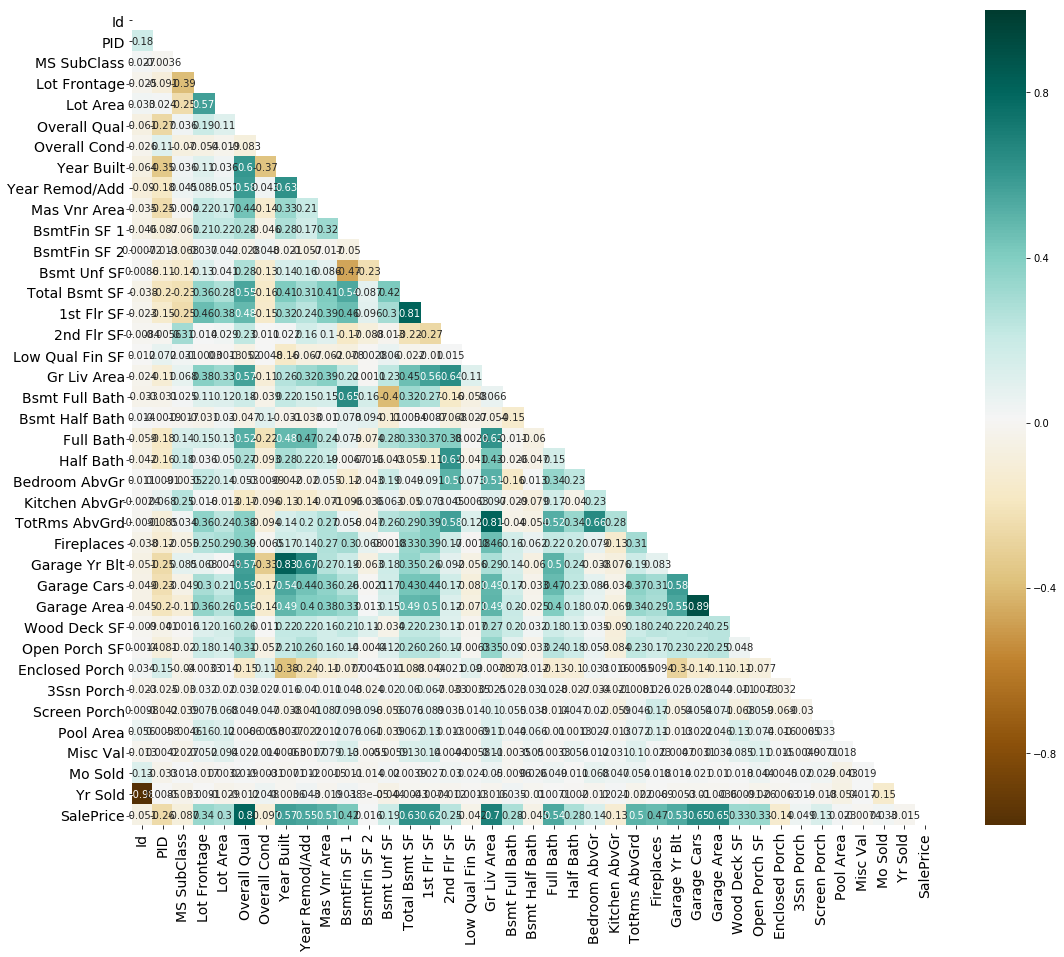

In [9]:
make_pair_plot(df.corr())

* This is a busy plot, but we can see right away a high correlation between Overall Quality and SalePrice
* Gr Live Area also important
* let's print out the most important
    

In [10]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.head(15))

SalePrice         1.000000
Overall Qual      0.800207
Gr Liv Area       0.697038
Garage Area       0.650270
Garage Cars       0.648220
Total Bsmt SF     0.628925
1st Flr SF        0.618486
Year Built        0.571849
Year Remod/Add    0.550370
Full Bath         0.537969
Garage Yr Blt     0.533922
Mas Vnr Area      0.512230
TotRms AbvGrd     0.504014
Fireplaces        0.471093
BsmtFin SF 1      0.423519
Name: SalePrice, dtype: float64


#### Impact of Quality and Gr Liv Area on Sale Price
* Gr Liv Area scatter plot show a couple of clear outliers where large houses sold for comparatively cheap
* if I replot against log transformed sale price, it does look a bit more linear

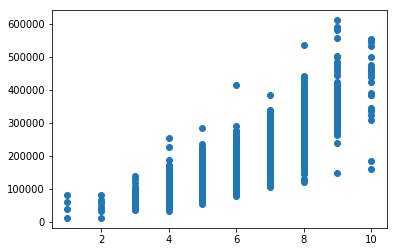

In [11]:
plt.scatter(df['Overall Qual'], df['SalePrice'])

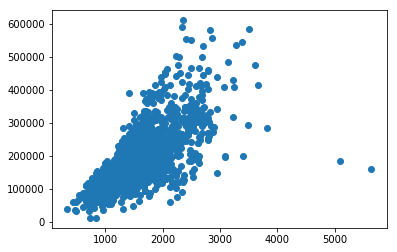

In [12]:
plt.scatter(df['Gr Liv Area'], df['SalePrice'])
# we have a couple obvious outliers here with very large living area and a cheap price

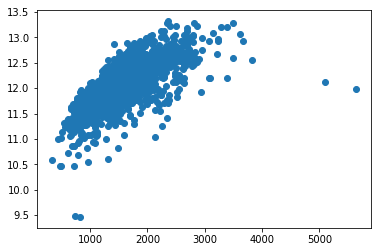

In [13]:
# replot against log transformed sale price -- a bit more linear
plt.scatter(df['Gr Liv Area'], np.log1p(df['SalePrice']))

Text(0,0.5,'Frequency')

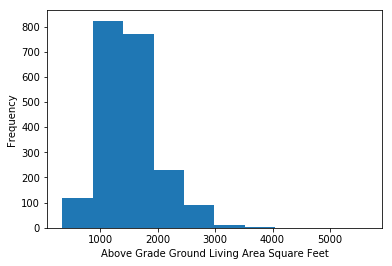

In [14]:
plt.hist(df['Gr Liv Area'])
plt.xlabel("Above Grade Ground Living Area Square Feet")
plt.ylabel("Frequency")

In [15]:
df['Gr Liv Area'][(df['Gr Liv Area']>=5000)]

960     5642
1885    5095
Name: Gr Liv Area, dtype: int64

In [16]:
# any rows missing these two key pieces of info?
df['Overall Qual'].isnull().sum(), df['Gr Liv Area'].isnull().sum()


(0, 0)

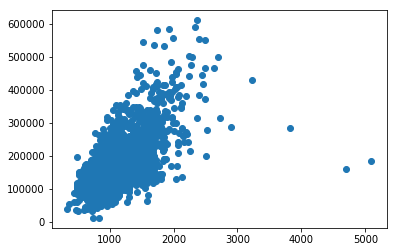

In [17]:
plt.scatter(df['1st Flr SF'], df['SalePrice'])

#### Impact of Year Built on SalePrice
* can see a lot more expensive houses built in recent years
* could be an interesting interaction here...

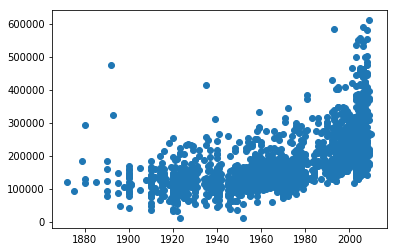

In [18]:
#plt.scatter(df['Year Built'][(df['Year Built']>=2000)], df['SalePrice'][(df['Year Built']>=2000)])
plt.scatter(df['Year Built'], df['SalePrice'])

#### Scatterplot of SalePrice
* clearly right skewed

Text(0,0.5,'Frequency')

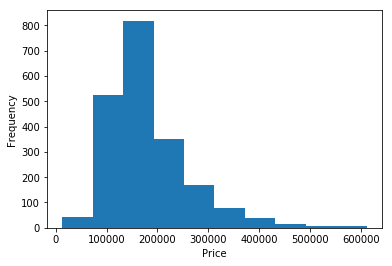

In [19]:
plt.hist(df['SalePrice'])
plt.xlabel("Price")
plt.ylabel("Frequency")
# price is right skewed

#### Impact of Month Sold on SalePrice

Text(0,0.5,'Frequency')

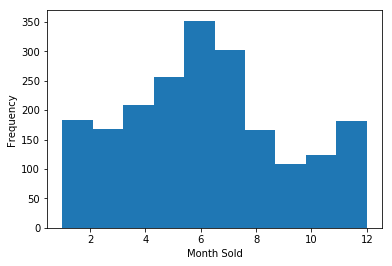

In [20]:
plt.hist(df['Mo Sold'])
plt.xlabel("Month Sold")
plt.ylabel("Frequency")
# price is right skewed

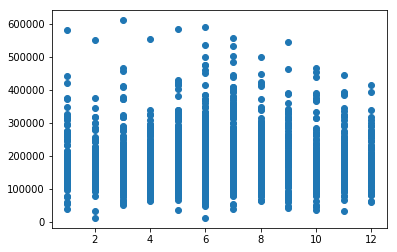

In [21]:
plt.scatter(df['Mo Sold'], df['SalePrice'])
# bit of a drop off in Dec

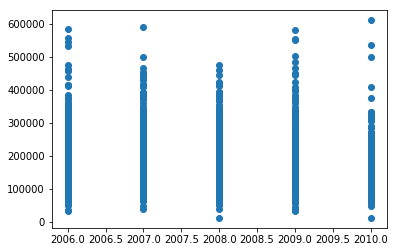

In [22]:
plt.scatter(df['Yr Sold'], df['SalePrice'])

## Baseline Model
Since Overall Quality is so highly correlated with house price, let's build a simple model that uses it to predict price

In [23]:
df_simple=df[['Overall Qual']]
y_simple= df[['SalePrice']]
lr =LinearRegression()
lr.fit(df_simple,y_simple)
lr.score(df_simple,y_simple)

0.6403310352003229

Our simple model using only Overall Quality to predict price has an accuracy of .64.  that is the benchmark we need to beat 

## Data Cleanup

* there are a few things we need to do/define before we do our main transforms in the dataframe mapper
* drop the two outliers in the dataset that sold for really cheap
* numerically encode features reated on poor to excellent scale (rankings have meaning here)
    * Ex Excellent4
     * Gd Good=3
    * TA Average/Typical=2
    * Fa Fair=1
    * Po Poor=0
 * Columns to drop:
    * can drop ID and PID colmsn
    * drop Pool QC column as 2042 of 2051 rows are missing
    * alley and Misc Feature are also missing many values 
    * drop Utilities because almost all houses have the same value therefore little predictive power
 * 

In [24]:
def make_binary(col):
     df[col]=df[col].apply(lambda x: 1 if x == 'Y' else 0 )

In [25]:
# drop the two outliers in the dataset that sold for really cheap
ix=df['Gr Liv Area'][(df['Gr Liv Area']>=5000)].index
df.drop(index = ix, axis=0, inplace=True)

In [26]:
# hack -- fill in missing garage year built before split and transform
def pre_fix_df(df):
    df['Garage Yr Blt'].fillna(df['Year Built'], inplace=True)
    # encode rankings
    score_dict={'Ex':5, 'Gd':4, 'TA': 3, 'Fa':2,'Po':1, 'NA': 0}
    for col in ['Kitchen Qual','Heating QC','Exter Qual','Exter Cond']:
        df[col] = df[col].fillna('TA') # default to mid range Typical
        df[col] = df[col].map(score_dict).astype(int)
    # handling ranked cols with NAs as valid entries
    for col in ['Bsmt Cond','Bsmt Qual','Fireplace Qu','Garage Qual','Garage Cond','Pool QC']:
        df[col] = df[col].fillna('NA') # default to not existing
        df[col] = df[col].map(score_dict).astype(int)
    
    # BsmtExposure
    exp_dict={'Gd':4, 'Av':3, 'Mn':2, 'No': 1, 'NA':0}
    df['Bsmt Exposure'] = df['Bsmt Exposure'].fillna('NA') # not existing
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map(exp_dict).astype(int)
                             
    # basement finishes
    finish_dict={'GLQ':6, 'ALQ' :5,'BLQ' :4, 'Rec':3,'LwQ' :2,'Unf':1,'NA':0 } 
    for col in ['BsmtFin Type 1', 'BsmtFin Type 2']:
        df[col] = df[col].fillna('NA')  # default to not existing
        df[col] = df[col].map(finish_dict).astype(int)
                             
    # home functionality rating
    func_dict={'Typ':7,'Min1':6,'Min2' :5,'Mod' :4,'Maj1' :3,'Maj2' :2,'Sev' : 1,'Sal' : 0 }
    df['Functional'] = df['Functional'].fillna('Typ') # default to typical
    df['Functional'] = df['Functional'].map(func_dict).astype(int)     
    
    # garage finish
    garage_finish_dict={'Fin':3,  'RFn':2,  'Unf':1,  'NA':0}
    df['Garage Finish'] = df['Garage Finish'].fillna('NA') # default to no garage
    df['Garage Finish'] = df['Garage Finish'].map(garage_finish_dict).astype(int) 


    # any binary columns we can convert to 0s and 1s?
    # * PavedDrive: Paved driveway (Y Paved
    # * CentralAir: Central air conditioning (N/Y
    df['Paved Drive']=df['Paved Drive'].apply(lambda x: 1 if x == 'Y' else 0 )
    df['Central Air']=df['Central Air'].apply(lambda x: 1 if x == 'Y' else 0 )
    return df

## Do our train test split

* create a DataFramemapper to transform the passed in dataframe
* do Inputation where needed and scale as appropriate

In [27]:
df.shape

(2049, 81)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,0:-1], df['SalePrice'], random_state=2003)
X_train.shape, X_test.shape, y_train.shape

((1536, 80), (513, 80), (1536,))

In [29]:
# what if we try log transform of price to address right skew?
if do_logtransform_price:
    y_train = np.log1p(y_train)
    y_test = np.log1p(y_test)

In [30]:

# drop the following columns by not including in mapper
#'Id','PID','Alley','Pool QC','Utilities'
mapper = DataFrameMapper([
    ('MS SubClass',[CategoricalImputer(), LabelBinarizer()]),
    #MS Zoning: Identifies the general zoning classification of the sale.
    ('MS Zoning', LabelBinarizer()),
    (['Lot Frontage'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['Lot Area'],[SimpleImputer(strategy='median'), StandardScaler()]),
    #('Lot Shape', LabelBinarizer()),
   # ('Land Contour', LabelBinarizer()),
    ('Lot Config', LabelBinarizer()),
   # ('Land Slope', LabelBinarizer()),
    ('Condition 1', LabelBinarizer()),
    ('Condition 2', LabelBinarizer()),
    ('Bldg Type', LabelBinarizer()),
    ('House Style', LabelBinarizer()),
    (['Overall Qual'], [SimpleImputer(strategy='median'), StandardScaler()]),
    (['Overall Cond'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['Year Built'], [StandardScaler()]),
    (['Year Remod/Add'],[ StandardScaler()]),
    ('Neighborhood', LabelBinarizer()),
    ('Roof Style', LabelBinarizer()),
    ('Roof Matl', LabelBinarizer()),
    ('Exterior 1st', LabelBinarizer()),
    #('Exterior 2nd', LabelBinarizer()),
    ('Mas Vnr Type',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
    # for masonry veneer, all houses with None for veneer in the dataset have 0 for the veneer area, so we'll do the same here
    #(['Mas Vnr Area'], [SimpleImputer(fill_value=0), StandardScaler()]),
    ('Exter Qual', None), #LabelBinarizer()), converted to ranked scale
    ('Exter Cond', None), # LabelBinarizer()), converted to ranked scale
    ('Foundation', LabelBinarizer()),
    ('Bsmt Cond', None), # converted to rank
    ('Bsmt Qual', None), # converted to rank [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    ('Bsmt Exposure',None), #[CategoricalImputer(replacement='None'), LabelBinarizer()]), chagned to ranking
    ('BsmtFin Type 1', None), #[CategoricalImputer(replacement='None'), LabelBinarizer()]),changed to ranking
    (['BsmtFin SF 1'], [SimpleImputer(fill_value=0), StandardScaler()]),
    #('BsmtFin Type 2', None), # [CategoricalImputer(replacement='None'), LabelBinarizer()]), changed to ranking
   # (['BsmtFin SF 2'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['Bsmt Unf SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['Total Bsmt SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    ('Heating', LabelBinarizer()),
    ('Heating QC', None), # LabelBinarizer()), # chagned to numeric ranking 1-5
    ('Central Air', None), # LabelBinarizer()), # Change to 0/1
   # ('Electrical',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
    (['1st Flr SF'], [SimpleImputer(strategy='median'), StandardScaler()]),
    (['2nd Flr SF'], [SimpleImputer(strategy='median'), StandardScaler()]),
    (['Low Qual Fin SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['Gr Liv Area'], [SimpleImputer(strategy='median'), StandardScaler()]),
    # remove scaling on number of baths/beds
    (['Bsmt Full Bath'], [SimpleImputer(fill_value=0)]),
    (['Bsmt Half Bath'], [SimpleImputer(fill_value=0)]),
    (['Full Bath'], [SimpleImputer(strategy='most_frequent')]),
    (['Half Bath'], [SimpleImputer(fill_value=0)]),
    (['Bedroom AbvGr'], [SimpleImputer(strategy='most_frequent')]),
    (['Kitchen AbvGr'], [SimpleImputer(strategy='most_frequent')]),
    ('Kitchen Qual', None), #LabelBinarizer()), # changed to numeric ranking 1-5
    
    (['TotRms AbvGrd'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
    ('Functional', None), # LabelBinarizer()), # added ranking
  # (['Fireplaces'], [SimpleImputer(fill_value=0), StandardScaler()]),
  #  ('Fireplace Qu', None), # [CategoricalImputer(replacement='NA'), LabelBinarizer()]), converted to rank
    ('Garage Type',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
   # (['Garage Yr Blt'], [StandardScaler()]), # TODO: set to year house built if missing
 #   ('Garage Finish', None), #[CategoricalImputer(replacement='None'), LabelBinarizer()]), converted to rank
 #   (['Garage Cars'],[SimpleImputer(strategy='median'), StandardScaler()]),
    (['Garage Area'], [SimpleImputer(strategy='median'), StandardScaler()]),
    # change to numerical ranking
    #('Garage Qual', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    #('Garage Cond', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
     ('Garage Qual', None),
    ('Garage Cond', None),  
    ('Paved Drive', None), #LabelBinarizer()), #  change to 0/1
    (['Wood Deck SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['Open Porch SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['Enclosed Porch'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['3Ssn Porch'], [SimpleImputer(fill_value=0), StandardScaler()]),
    (['Pool Area'], [SimpleImputer(fill_value=0), StandardScaler()]),
    #('Pool QC', None),
    ('Fence', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
    #('Misc Feature', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
   # (['Misc Val'], [SimpleImputer(fill_value=0), StandardScaler()]),
   # (['Mo Sold'], [StandardScaler()]),
    #(['Mo Sold'], [StandardScaler()]), # month isn't really a ranking -- probably better to bin it
    (['Yr Sold'], [StandardScaler()]),
    ('Sale Type', LabelBinarizer())
], df_out=True)


In [31]:
# ## df_out=True: returns a fully formatted dataframe

# # drop the following columns by not including in mapper
# #'Id','PID','Alley','Pool QC','Utilities'


# mapper_back = DataFrameMapper([
#     ('MS SubClass',[CategoricalImputer(), LabelBinarizer()]),
#     #MS Zoning: Identifies the general zoning classification of the sale. categorical (i.e. A=Agriculutre, C=Commercial) most are RL (1598), Rm(316) combine all residential zoned RL RM and RH?
#     ('MS Zoning', LabelBinarizer()),
#     (['Lot Frontage'],[SimpleImputer(strategy='median'), StandardScaler()]),
#     (['Lot Area'],[SimpleImputer(strategy='median'), StandardScaler()]),
#     #('Lot Shape', LabelBinarizer()),
#     ('Land Contour', LabelBinarizer()),
#     ('Lot Config', LabelBinarizer()),
#    # ('Land Slope', LabelBinarizer()),
#     ('Condition 1', LabelBinarizer()),
#     ('Condition 2', LabelBinarizer()),
#     ('Bldg Type', LabelBinarizer()),
#     ('House Style', LabelBinarizer()),
#     (['Overall Qual'], [SimpleImputer(strategy='median'), StandardScaler()]),
#     (['Overall Cond'],[SimpleImputer(strategy='median'), StandardScaler()]),
#     (['Year Built'], [StandardScaler()]),
#     (['Year Remod/Add'],[ StandardScaler()]),
#     ('Neighborhood', LabelBinarizer()),
#     ('Roof Style', LabelBinarizer()),
#     ('Roof Matl', LabelBinarizer()),
#     ('Exterior 1st', LabelBinarizer()),
#     ('Exterior 2nd', LabelBinarizer()),
#     ('Mas Vnr Type',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     # for masonry veneer, all houses with None for veneer in the dataset have 0 for the veneer area, so we'll do the same here
#     (['Mas Vnr Area'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     ('Exter Qual', None), #LabelBinarizer()), converted to ranked scale
#     ('Exter Cond', None), # LabelBinarizer()), converted to ranked scale
#     ('Foundation', LabelBinarizer()),
#     ('Bsmt Cond', None), # converted to rank
#     ('Bsmt Qual', None), # converted to rank [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     ('Bsmt Exposure',None), #[CategoricalImputer(replacement='None'), LabelBinarizer()]), chagned to ranking
#     ('BsmtFin Type 1', None), #[CategoricalImputer(replacement='None'), LabelBinarizer()]),changed to ranking
#     (['BsmtFin SF 1'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     ('BsmtFin Type 2', None), # [CategoricalImputer(replacement='None'), LabelBinarizer()]), changed to ranking
#     (['BsmtFin SF 2'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Bsmt Unf SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Total Bsmt SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     ('Heating', LabelBinarizer()),
#     ('Heating QC', None), # LabelBinarizer()), # chagned to numeric ranking 1-5
#     ('Central Air', None), # LabelBinarizer()), # Change to 0/1
#     ('Electrical',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     (['1st Flr SF'], [SimpleImputer(strategy='median'), StandardScaler()]),
#     (['2nd Flr SF'], [SimpleImputer(strategy='median'), StandardScaler()]),
#     (['Low Qual Fin SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Gr Liv Area'], [SimpleImputer(strategy='median'), StandardScaler()]),
#     (['Bsmt Full Bath'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Bsmt Half Bath'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Full Bath'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
#     (['Half Bath'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Bedroom AbvGr'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
#     (['Kitchen AbvGr'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
#     ('Kitchen Qual', None), #LabelBinarizer()), # changed to numeric ranking 1-5
    
#     (['TotRms AbvGrd'], [SimpleImputer(strategy='most_frequent'), StandardScaler()]),
#     ('Functional', None), # LabelBinarizer()), # added ranking
#     (['Fireplaces'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     ('Fireplace Qu', None), # [CategoricalImputer(replacement='NA'), LabelBinarizer()]), converted to rank
#     ('Garage Type',[CategoricalImputer(replacement='None'), LabelBinarizer()]),
#    # (['Garage Yr Blt'], [StandardScaler()]), # TODO: set to year house built if missing
#     ('Garage Finish', None), #[CategoricalImputer(replacement='None'), LabelBinarizer()]), converted to rank
#  #   (['Garage Cars'],[SimpleImputer(strategy='median'), StandardScaler()]),
#     (['Garage Area'], [SimpleImputer(strategy='median'), StandardScaler()]),
#     # change to numerical ranking
#     #('Garage Qual', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     #('Garage Cond', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#      ('Garage Qual', None),
#     ('Garage Cond', None),  
#     ('Paved Drive', None), #LabelBinarizer()), #  change to 0/1
#     (['Wood Deck SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Open Porch SF'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Enclosed Porch'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['3Ssn Porch'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Pool Area'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     ('Pool QC', None),
#     ('Fence', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     ('Misc Feature', [CategoricalImputer(replacement='None'), LabelBinarizer()]),
#     (['Misc Val'], [SimpleImputer(fill_value=0), StandardScaler()]),
#     (['Mo Sold'], [StandardScaler()]),
#     #(['Mo Sold'], [StandardScaler()]), # month isn't really a ranking -- probably better to bin it
#     (['Yr Sold'], [StandardScaler()]),
#     ('Sale Type', LabelBinarizer())
# ], df_out=True)


In [32]:
X_train=pre_fix_df(X_train)


In [33]:
X_train=mapper.fit_transform(X_train)
#X_train.drop(columns='Id',inplace=True,axis=1)
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted

,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Yr Sold,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
718,1,0,0,0,0,0,0,0,0,0,...,0.197122,0,0,0,0,0,0,0,0,1
1800,0,0,0,0,0,1,0,0,0,0,...,0.197122,0,0,0,0,0,0,0,0,1
239,0,0,0,0,1,0,0,0,0,0,...,-1.339832,0,0,0,0,0,0,0,0,1
741,1,0,0,0,0,0,0,0,0,0,...,-1.339832,0,0,0,0,0,0,0,0,1
1293,0,0,0,0,0,1,0,0,0,0,...,0.197122,0,0,0,0,0,0,0,0,1


Apply same mapper to our test data

In [34]:
X_test=pre_fix_df(X_test)
X_test = mapper.transform(X_test)
#X_test.drop(columns='Id',inplace=True,axis=1)
X_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Yr Sold,Sale Type_COD,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
19,0,0,0,0,0,1,0,0,0,0,...,1.734076,0,0,1,0,0,0,0,0,0
1999,0,0,0,0,1,0,0,0,0,0,...,-0.571355,0,0,0,0,0,0,0,0,1
97,1,0,0,0,0,0,0,0,0,0,...,-0.571355,0,0,0,0,0,0,0,0,1
1032,0,0,0,0,0,1,0,0,0,0,...,0.965599,0,0,0,0,0,0,0,0,1
1495,1,0,0,0,0,0,0,0,0,0,...,1.734076,0,0,0,0,0,0,0,0,1


In [35]:
# double check for nulls
for col in X_train.columns:
    if X_train[col].isnull().sum() >0:
        print(col)

## Feature Engineering

* There likely certain features that play a much bigger role in the pricing of a house (overall quality, square footage, neighborhood etc) than others (fence quality etc).  Let's try playing with some polynomial feature engineering on the features with the highest correlation with price
* but first let's spot check the impact of some of hte categorical variables on price

In [36]:

filter_col = [col for col in X_train if col.startswith('Neighborhood')]
X_train[filter_col].corrwith(y_train).sort_values(ascending=False)

Neighborhood_NridgHt    0.378110
Neighborhood_NoRidge    0.212223
Neighborhood_StoneBr    0.204756
Neighborhood_Somerst    0.170267
Neighborhood_CollgCr    0.124926
Neighborhood_Timber     0.114410
Neighborhood_Veenker    0.086411
Neighborhood_Crawfor    0.074820
Neighborhood_NWAmes     0.073265
Neighborhood_ClearCr    0.067311
Neighborhood_Gilbert    0.066445
Neighborhood_GrnHill    0.042854
Neighborhood_SawyerW    0.040894
Neighborhood_Blmngtn    0.032802
Neighborhood_Greens     0.012019
Neighborhood_Mitchel   -0.012340
Neighborhood_Landmrk   -0.012460
Neighborhood_Blueste   -0.023878
Neighborhood_NPkVill   -0.035459
Neighborhood_SWISU     -0.083332
Neighborhood_MeadowV   -0.113294
Neighborhood_BrDale    -0.115791
Neighborhood_Sawyer    -0.119071
Neighborhood_NAmes     -0.155250
Neighborhood_BrkSide   -0.171960
Neighborhood_Edwards   -0.220611
Neighborhood_OldTown   -0.244881
Neighborhood_IDOTRR    -0.256044
dtype: float64

In [37]:

filter_col = [col for col in X_train if col.startswith('MS SubClass')]
X_train[filter_col].corrwith(y_train).sort_values(ascending=False)

MS SubClass_60     0.375497
MS SubClass_120    0.133821
MS SubClass_20     0.066047
MS SubClass_75     0.019337
MS SubClass_80    -0.000331
MS SubClass_150   -0.007569
MS SubClass_85    -0.027085
MS SubClass_40    -0.045686
MS SubClass_45    -0.047847
MS SubClass_180   -0.061897
MS SubClass_70    -0.079493
MS SubClass_90    -0.098280
MS SubClass_190   -0.105547
MS SubClass_160   -0.107884
MS SubClass_50    -0.195250
MS SubClass_30    -0.340250
dtype: float64

In [38]:

filter_col = [col for col in X_train if col.startswith('MS Zoning')]
X_train[filter_col].corrwith(y_train).sort_values(ascending=False)

MS Zoning_RL         0.264351
MS Zoning_FV         0.127249
MS Zoning_RH        -0.035396
MS Zoning_I (all)   -0.065458
MS Zoning_A (agr)   -0.141717
MS Zoning_C (all)   -0.195090
MS Zoning_RM        -0.314257
dtype: float64

In [39]:
def add_polynomialfeatures(df):
    poly = PolynomialFeatures(include_bias=False, degree=2)
    features = ['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF','Garage Area','1st Flr SF','Year Built','Full Bath']
    X_poly = poly.fit_transform(df[features])
    poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(features))
    # drop the original columns so we can concatenate this with our original dataframe
    poly_df.drop(columns=features, axis=1, inplace=True)
    newcols = poly_df.columns
    #print(list(newcols))
    #df[list(newcols)] = poly_df[newcols].values
    for col in newcols:
        df[col] = poly_df[col].values
    return df

In [40]:
X_train=add_polynomialfeatures(X_train)
X_test=add_polynomialfeatures(X_test)

In [41]:
X_train.columns

Index(['MS SubClass_20', 'MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45',
       'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75',
       'MS SubClass_80', 'MS SubClass_85',
       ...
       'Garage Area^2', 'Garage Area 1st Flr SF', 'Garage Area Year Built',
       'Garage Area Full Bath', '1st Flr SF^2', '1st Flr SF Year Built',
       '1st Flr SF Full Bath', 'Year Built^2', 'Year Built Full Bath',
       'Full Bath^2'],
      dtype='object', length=213)

## Feature Selection

In [42]:
X_train.shape

(1536, 213)

Test 1 : variance threshold

In [43]:
if run_full:
    threshold = VarianceThreshold(.05)
    X_threshold = threshold.fit_transform(X_train)
    X_threshold.shape


In [44]:
if run_full:
    # score it for comparison
    included = X_train.columns[threshold.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())

0.9021519356061021


Test2 : select K best

In [45]:
#for k in [50,75,100,125,150,175,200,225, 250]:
for k in [50,70, 75, 80, 85, 90, 95,100,125,130, 150]:
    kbest = SelectKBest(score_func=f_regression, k=k)
    X_kbest = kbest.fit_transform(X_train, y_train)
    included = X_train.columns[kbest.get_support()]
    print(k, round(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean(),5))
    #print(k,cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5))


50 0.88748
70 0.89679
75 0.89799
80 0.89919
85 0.89827
90 0.8951
95 0.89645
100 0.89767
125 0.9035
130 0.9022
150 -9.613271922481239e+21


Test 3: K Precentile

In [46]:
if run_full:
    percent = SelectPercentile(f_regression, 30)
    X_percent = percent.fit_transform(X_train, y_train)
    X_percent.shape
    

In [47]:
# score it for comparison
if run_full:
    included = X_train.columns[percent.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())

0.8900089568011597


Test 4: select from Model

In [48]:
if run_full:
    select_lasso = SelectFromModel(Lasso(alpha=.001))
    X_sel_lasso = select_lasso.fit_transform(X_train, y_train)
    X_sel_lasso.shape
    

In [49]:
if run_full:
    # score it for comparison
    included = X_train.columns[select_lasso.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())

0.9196160757209194


In [50]:
for alpha in [.001, .01, .1]:
    select_lasso = SelectFromModel(Lasso(alpha=alpha))
    X_sel_lasso = select_lasso.fit_transform(X_train, y_train)
    included = X_train.columns[select_lasso.get_support()]
    print(alpha, round(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean(),5))
    #print(alpha, round(cross_val_score(KNeighborsRegressor(n_neighbors=8, metric='manhattan',weights='distance'), X_train.loc[:,included], y_train, cv=5).mean(),5))
   # print(alpha, cross_val_score(KNeighborsRegressor(n_neighbors=8, metric='manhattan',weights='distance'), X_train.loc[:,included], y_train, cv=5))
    #print(alpha,cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5))

0.001 0.91962
0.01 0.90081
0.1 0.77108


Test 5: RFECV

In [51]:
if run_full:
    rfe = RFECV(Lasso(alpha=.001), step=10,cv=5, min_features_to_select=50) #,verbose=2)
    X_rfe = rfe.fit_transform(X_train, y_train)
    X_rfe.shape


In [52]:
if run_full:
    # score it for comparison
    included = X_train.columns[rfe.get_support()]
    print(cross_val_score(LinearRegression(), X_train.loc[:,included], y_train, cv=5).mean())
    #print(rfe.get_support().shape)
    print(X_train.loc[:,rfe.get_support()].shape)

0.9192758800218062
(1536, 93)


#### Best Feature selection model
* depending on the changes made, generally either the KBest or Lasso models are producing the best results 

In [53]:
kbest = SelectKBest(score_func=f_regression, k=100)
X_kbest = kbest.fit_transform(X_train, y_train)
X_kbest.shape
selected_features=kbest.get_support()

In [54]:
# select_lasso = SelectFromModel(Lasso(alpha=.001))
# X_sel_lasso = select_lasso.fit_transform(X_train, y_train)
# selected_features=select_lasso.get_support()

In [55]:
# preview selected columns
X_train.columns[selected_features][:10]

Index(['MS SubClass_30', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_120',
       'MS Zoning_A (agr)', 'MS Zoning_C (all)', 'MS Zoning_FV',
       'MS Zoning_RL', 'MS Zoning_RM', 'Lot Frontage'],
      dtype='object')

#### Try GridSearch on KNN Regression to find best parameters

In [56]:
# knn_params = {
#     'n_neighbors':[8,9,10,11,12,13],
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }
# #5,10,15,20,25
# knn_gridsearch = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, verbose=1, n_jobs=2)

# knn_gridsearch = knn_gridsearch.fit(X_train.loc[:,included], y_train)

In [57]:
# knn_gridsearch.best_score_

In [58]:
# knn_gridsearch.best_params_

## Run Selected Model

In [59]:
print(chosen_model)
if chosen_model == "LinearRegression":
    model = LinearRegression()
    model.fit(X_train.loc[:,selected_features],y_train)
    print(model.score(X_test.loc[:,selected_features], y_test))
else:
    model=KNeighborsRegressor(n_neighbors=8, metric='manhattan',weights='distance')
    model.fit(X_train.loc[:,selected_features],y_train)
    print(model.score(X_test.loc[:,selected_features], y_test))

LinearRegression
0.9008110821673151


Let's examine our coefficients to get an idea of what's going on

In [60]:
if chosen_model == "LinearRegression":
    df_model_coef = pd.DataFrame(model.coef_, 
                 index = X_test.loc[:,selected_features].columns, 
                 columns=['weight'])

    # remember these are all scaled
    # but shows relative importance
    df_model_coef.sort_values(by='weight', ascending=False, inplace=True)
    print(df_model_coef.head(20))

                        weight
Overall Qual          0.144035
Sale Type_New         0.102626
Mas Vnr Type_Stone    0.084274
MS SubClass_50        0.071151
Central Air           0.068019
Gr Liv Area           0.066868
Total Bsmt SF         0.061818
Garage Type_Detchd    0.059740
Mas Vnr Type_None     0.053381
Neighborhood_StoneBr  0.053250
Paved Drive           0.053226
Mas Vnr Type_BrkFace  0.050473
Functional            0.050193
2nd Flr SF            0.048114
Sale Type_WD          0.047586
Garage Type_Attchd    0.045792
Lot Config_CulDSac    0.039290
Garage Type_BuiltIn   0.039030
MS SubClass_60        0.038963
1st Flr SF            0.036404


### Evalulate our model

In [61]:
y_pred= model.predict(X_test.loc[:,selected_features])

In [62]:
# Mean Squared Error MSE
if do_logtransform_price:
    print(mean_squared_error(np.exp(y_test) -1, np.exp(y_pred) -1))
else:
    print(mean_squared_error(y_test, y_pred))


492632403.9868107


In [63]:
# RMSE

if do_logtransform_price:
    print(np.sqrt(mean_squared_error(np.exp(y_test) -1, np.exp(y_pred) -1)))
else:
    print(np.sqrt(mean_squared_error(y_test, y_pred)))

22195.32392164644


* root mean squared error returns our error back to our original units of y (cost)
* so, if RMSE is 25740, that means our average mistake in house price is $25,740

Text(0,0.5,'preds')

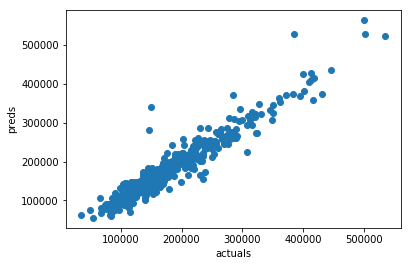

In [64]:

if do_logtransform_price:
    plt.scatter(np.exp(y_test) -1, np.exp(y_pred) -1)
else:
    plt.scatter(y_test, y_pred)
plt.xlabel("actuals")
plt.ylabel("preds")
# we are underpredicting at the high end

Text(0.5,1,'Residual plot')

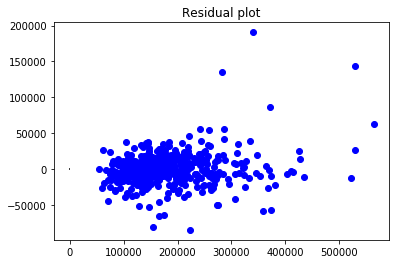

In [65]:
# residual plot
if do_logtransform_price:
    x_plot = plt.scatter(np.exp(y_pred) -1, ((np.exp(y_pred) -1) - (np.exp(y_test)-1)), c='b')
else:
    x_plot = plt.scatter(y_pred, (y_pred - y_test), c='b')
plt.hlines(y=0, xmin= -1000, xmax=1000)
plt.title('Residual plot')
# see more clearly that we are underpredicting


* Residual plot has been showing some signs of “heteroscedasticity”, meaning that the residuals are larger for more expensive houses

# Generate our predictions

* read and transform the test.csv dataset following same steps applied to training file
* save the id column to a separate dataframe for outputing our predictions

In [66]:
df_final_validate = pd.read_csv("test.csv")
df_final_preds = df_final_validate[['Id']]
df_final_preds.head()

,Id
0,2658
1,2718
2,2414
3,1989
4,625


In [67]:

df_final_validate=pre_fix_df(df_final_validate)
df_final_validate = mapper.transform(df_final_validate)
df_final_validate=add_polynomialfeatures(df_final_validate)
df_final_validate.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,...,Garage Area^2,Garage Area 1st Flr SF,Garage Area Year Built,Garage Area Full Bath,1st Flr SF^2,1st Flr SF Year Built,1st Flr SF Full Bath,Year Built^2,Year Built Full Bath,Full Bath^2
0,0,0,0,0,0,0,0,0,0,0,...,0.029124,0.115755,0.352971,-0.341316,0.460075,1.402899,-1.356577,4.277833,-4.136585,4.0
1,0,0,0,0,0,0,0,0,0,0,...,0.228514,1.024983,0.078815,0.956063,4.597482,0.353520,4.288348,0.027184,0.329750,4.0
2,0,0,0,0,0,1,0,0,0,0,...,0.055473,0.312922,-0.266492,-0.471054,1.765180,-1.503272,-2.657202,1.280224,2.262939,4.0
3,0,1,0,0,0,0,0,0,0,0,...,0.000216,-0.007611,-0.024005,0.014682,0.268713,0.847540,-0.518376,2.673196,-1.634991,1.0
4,1,0,0,0,0,0,0,0,0,0,...,0.029660,0.106261,-0.051969,0.172221,0.380696,-0.186186,0.617006,0.091057,-0.301757,1.0


In [68]:
#df_final_validate.loc[:,kbest.get_support()].describe().T

In [69]:
final_validate_pred = model.predict(df_final_validate.loc[:,selected_features])
final_validate_pred[0:10]

array([11.68802237, 12.0340118 , 12.258475  , 11.55948466, 12.00870239,
       11.46135802, 11.63518233, 11.98529285, 12.11745434, 12.00769087])

add our sale price predictions to the df_final_preds dataframe and then save it as a csv for export

In [70]:
if do_logtransform_price:
    df_final_preds['SalePrice'] = round(np.exp(pd.Series(final_validate_pred))-1,2)
else:
    df_final_preds['SalePrice'] = pd.Series(final_validate_pred)
df_final_preds.to_csv("ag_preliminary.csv", index=False)

In [71]:
df_final_preds.head()

,Id,SalePrice
0,2658,119135.17
1,2718,168384.59
2,2414,210758.93
3,1989,104765.01
4,625,164176.33


## Actions Taken
* model that uses all features does better than our baseline simple model
* our simple baseline model used Overal Quality rating to predict house prices and acheived an R2 score of .64 (64% of the variability in pirces can be explained by that feature alone)
* next model used LinearRegression on basically all the features in the data set with no selection or engineering -- did ok
* next added feature selection to whittle down number of features (generally KBest was the best feature selection, although Lasso often worked well too.  Generally, it helped to remove about half the features)
* Next removed two outliers from the training dataframe (these were large houses that sold for relatively cheap)
* changed from treating ranked features (i.e. po, fair, good, excellent condition) to numeric rankings
* Became worried that most importand predictors (such as overall quality and square footage, both of which have a very high correlation with sale price were becoming lost in the noise of all the features.  So added Polynomial features on the top correlated features (tried 2nd and 3rd degree - 2nd had better results)
* noticed on residual plot that the model was consistently poor at predicting the higher priced houses.  It showed signs of heteroscedasticity, with bigger errors for higher house prices.  So tried adding a log transform on house price to counteract this -- it did help
* Tried KNeighborsRegression in case it was better able to handle the right-skew of sale price, but it performed somewhat worse
* returned to LinearREgression and played with removing some additional features



## Final Model

* finally settled on using model that used:
    * KBest to pick the top 125 columns 
    * LInear Regression
    * reduced basic features
    * polynomial features on top 10 numeric columns correlated with sale price
    * log transform of house price